# Scatter Plot

In [30]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [31]:
df=df[df['job_title_short'] == 'Data Scientist']
df_exploded = df.explode('job_skills')
df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)


,skill_count,median_salary
job_skills,,
airflow,3915,157000.0
airtable,65,215500.0
alteryx,2068,115000.0
angular,736,93500.0
angular.js,12,NaN
...,...,...
wrike,8,NaN
wsl,31,NaN
xamarin,5,NaN


In [32]:
skills_stat = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skills_stat = skills_stat.sort_values(by='skill_count', ascending=False ).head(10)

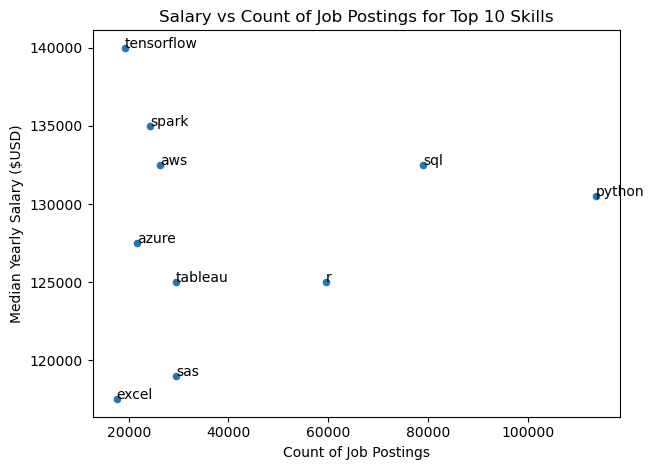

In [33]:
skills_stat.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skills_stat.index):
    plt.text(skills_stat['skill_count'].iloc[i], skills_stat['median_salary'].iloc[i], txt)

plt.show()